<a href="https://colab.research.google.com/github/poorvaa18/Next_Word_Predictor/blob/main/NextWord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM-based Next Word Predictor

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

Sure! Here's an explanation of each library mentioned in the code:

1. **TensorFlow (`import tensorflow as tf`)**: TensorFlow is an open-source machine learning framework that provides a wide range of tools and libraries for building and training machine learning models. It includes various APIs and modules for working with neural networks, optimization algorithms, data preprocessing, and more.

2. **TensorFlow Keras (`from tensorflow.keras...`)**: TensorFlow Keras is the high-level API provided by TensorFlow for building and training deep learning models. It provides a user-friendly interface for defining neural networks, configuring layers, and training models.

3. **Tokenizer (`from tensorflow.keras.preprocessing.text import Tokenizer`)**: The Tokenizer class in Keras preprocessing module is used to tokenize text documents into individual words or characters. It helps in converting text into a numerical representation that can be fed into a neural network for training or inference.

4. **Embedding (`from tensorflow.keras.layers import Embedding`)**: The Embedding layer in Keras is used for word embedding. It maps each word in a text sequence to a high-dimensional vector representation. Embeddings capture semantic relationships between words and are commonly used as input to neural networks in natural language processing tasks.

5. **LSTM (`from tensorflow.keras.layers import LSTM`)**: LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) layer. It is commonly used for processing sequential data, such as text or time series data, by capturing long-term dependencies and handling the vanishing gradient problem.

6. **Dense (`from tensorflow.keras.layers import Dense`)**: The Dense layer in Keras is a fully connected layer, where each neuron is connected to every neuron in the previous layer. It is used for introducing non-linearity and learning complex patterns in the data.

7. **Sequential (`from tensorflow.keras.models import Sequential`)**: The Sequential model in Keras is a linear stack of layers. It allows you to build models layer-by-layer, where the output of each layer becomes the input of the next layer. Sequential models are commonly used for building feedforward neural networks.

8. **to_categorical (`from tensorflow.keras.utils import to_categorical`)**: The to_categorical function in Keras utils module is used for one-hot encoding categorical labels. It converts integer labels into binary vectors, where each label is represented as a vector with all zeros except for the index corresponding to the label, which is set to one.

9. **Adam (`from tensorflow.keras.optimizers import Adam`)**: Adam is an optimization algorithm commonly used for training deep learning models. It adapts the learning rate dynamically and combines ideas from both AdaGrad and RMSProp algorithms. The Adam optimizer is often used for its good convergence properties and efficiency.

These libraries and modules provided by TensorFlow and TensorFlow Keras offer a wide range of functionalities for building and training machine learning models, especially for tasks related to text processing and sequence data.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Romeo&Juliet.txt to Romeo&Juliet.txt


In [8]:
file= open("Romeo&Juliet.txt",'r',encoding='utf8')
#storing file in a lit
linelist=[]
for i in file:
  linelist.append(i)

#converting list into string
data=""
for i in linelist:
  data=' '.join(linelist)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')
#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]  #selecting only first 500 characters

'The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [9]:
len(data)

160221

In [10]:
#tokenizing 
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#texts_to_sequences() method takes a list of texts as input and converts each text 
#into a sequence of integers based on the vocabulary learned by the tokenizer during the fitting step.
sequence_data=tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

pickle.dump(tokenizer,open('token.pkl','wb'))

In [11]:
sequence_data[:15]
#It provides a preview of the converted text data by showing the first 15 integers in the sequence.

[1, 53, 49, 306, 6, 12, 2, 22, 32, 967, 783, 16, 306, 8, 18]

In [12]:
len(sequence_data)

29352

In [13]:
#adding 1, the code accounts for an additional index that is reserved for out-of-vocabulary (OOV) words
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)
#represents the total number of unique words in the vocabulary,

4282


In [15]:
sequence=[]
for i in range(3, len(sequence_data)):
  words=sequence_data[i-3:i+1] #prediction of 4th word
  sequence.append(words)

sequence=np.array(sequence)
sequence[:5]
#the first 3 words are the input and the last word will be output

array([[  1,  53,  49, 306],
       [ 53,  49, 306,   6],
       [ 49, 306,   6,  12],
       [306,   6,  12,   2],
       [  6,  12,   2,  22]])

In [17]:
x=[]
y=[]
for i in sequence:
  x.append(i[0:3])
  y.append(i[3])

X=np.array(x)
y=np.array(y)
print("Data ",X[:10])
print('Response ',y[:10])

Data  [[  1  53  49]
 [ 53  49 306]
 [ 49 306   6]
 [306   6  12]
 [  6  12   2]
 [ 12   2  22]
 [  2  22  32]
 [ 22  32 967]
 [ 32 967 783]
 [967 783  16]]
Response  [306   6  12   2  22  32 967 783  16 306]


In [18]:
#to_categorical function converts y into a one-hot encoded representation, where each value in y is converted into a binary vector of length vocab_size.
y = to_categorical(y,num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             42820     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 4282)              4286282   
                                                                 
Total params: 17,378,102
Trainable params: 17,378,102
Non-trainable params: 0
_________________________________________________________________


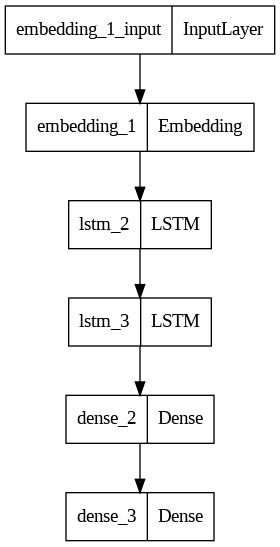

In [21]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=7, batch_size=64, callbacks=[checkpoint])

Epoch 1/7
459/459 [==============================] - ETA: 0s - loss: 6.7811
Epoch 1: loss improved from inf to 6.78105, saving model to next_words.h5
459/459 [==============================] - 150s 321ms/step - loss: 6.7811
Epoch 2/7
459/459 [==============================] - ETA: 0s - loss: 6.4466
Epoch 2: loss improved from 6.78105 to 6.44661, saving model to next_words.h5
459/459 [==============================] - 151s 329ms/step - loss: 6.4466
Epoch 3/7
459/459 [==============================] - ETA: 0s - loss: 6.1845
Epoch 3: loss improved from 6.44661 to 6.18452, saving model to next_words.h5
459/459 [==============================] - 152s 331ms/step - loss: 6.1845
Epoch 4/7
459/459 [==============================] - ETA: 0s - loss: 5.9256
Epoch 4: loss improved from 6.18452 to 5.92564, saving model to next_words.h5
459/459 [==============================] - 151s 330ms/step - loss: 5.9256
Epoch 5/7
459/459 [==============================] - ETA: 0s - loss: 5.6682
Epoch 5: loss im

In [25]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue


Enter your line: The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 [==============================] - 1s 649ms/step
tm
Enter your line: eBook of Romeo 
['of', 'Romeo', '']
1/1 [==============================] - 1s 538ms/step
and
